# Linear Regression

In [1]:
import random
random.seed(0)

import numpy as np
import pandas as pd

from IPython.display import display

# graphic packages
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
    import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from sklearn import preprocessing

from ISLP import load_data

## Exercise 8

In [2]:
data = load_data("Auto").reset_index()

# extract predictors and response from data
X = pd.DataFrame({'intercept': np.ones(data.shape[0]),
                  'horsepower': data['horsepower']})
Y = data['mpg']

# use sm.OSL() function to perform a simple linear regression
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 16 Sep 2025   Prob (F-statistic):           7.03e-81
Time:                        09:54:06   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 8.a

The F-statistic is high (~599.7) and the Prob(F-statistic) (i.e. its p-value) is very low (7.03e-81). This strongly rejects the null hypothesis that all regression coefficients (except the intercept) are 0, indicating that the model provides a better fit than a model with no predictors. In this case, it suggests a statistically strong relationship between the predictor `horsepower` and the response `mpg`.

The R-squared and adjusted R-squared are around 0.606 and 0.605 respectively. This indicates that about 60% of the variance in the response `mpg` is explained by the model. Whether this level of explanatory power is sufficient depends on the specific context and domain expectations.

The coefficient of `horsepower` is negative (-0.1578) indicate an inverse relationship between `horsepower` and `mpg` - as `horsepower` increases, `mpg` tends to decrease. The t-statistic is large in magnitude (-24.489), its p-value is effectively 0, and its confidence interval doesn't include 0. These provide strong statistical evidence that the relationship between `horsepower` and `mpg` is real and significant.

In [3]:
# predict mpg given horsepower = 98. What are the associated 95% confidence and prediction intervals?

# generate prediction input data
pred_data = pd.DataFrame({'intercept': [1], 'horsepower':[98]})

# make prediction using model
pred_result = model.get_prediction(pred_data)
pred_result.summary_frame(alpha=0.05) #alpha=0.05 -> 95% intervals

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


The predicted `mpg` associated with a `horsepower` of 98 is 24.467077.

The confidence interval for the `mean mpg` at this `horsepower` is [23.973079, 24.961075]. This means we are 95% confident that the `mean mpg` for all cars at this `horsepower` falls within this range.

The prediction interval for an individual car's `mpg` at this `horsepower` is [14.809396, 34.124758]. This means that we are 95% confident that the `mpg` of a single car at this `horsepower` falls within this range.

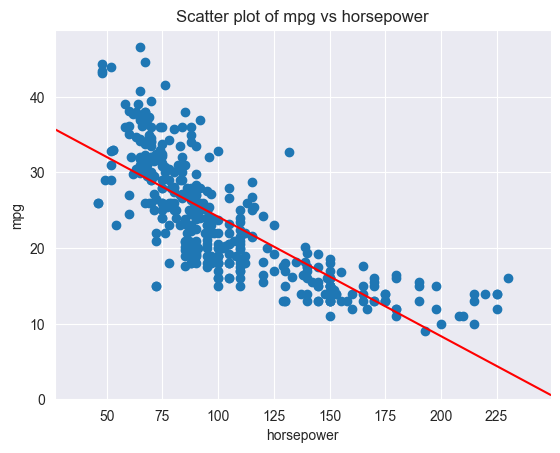

In [4]:
# plot the response vs. predictor
fig, ax = subplots(1,1)
ax.scatter(data['horsepower'], data['mpg']);
ax.set_xlabel('horsepower')
ax.set_ylabel('mpg')
ax.set_title('Scatter plot of mpg vs horsepower')

# plot the regression line on the same ax
x_lim = np.array(ax.get_xlim())
y_lim = model.params['intercept'] + model.params['horsepower'] * x_lim
# ax.plot(x_lim, y_lim, color='red');
ax.axline((x_lim[0], y_lim[0]), (x_lim[1], y_lim[1]), color='red');


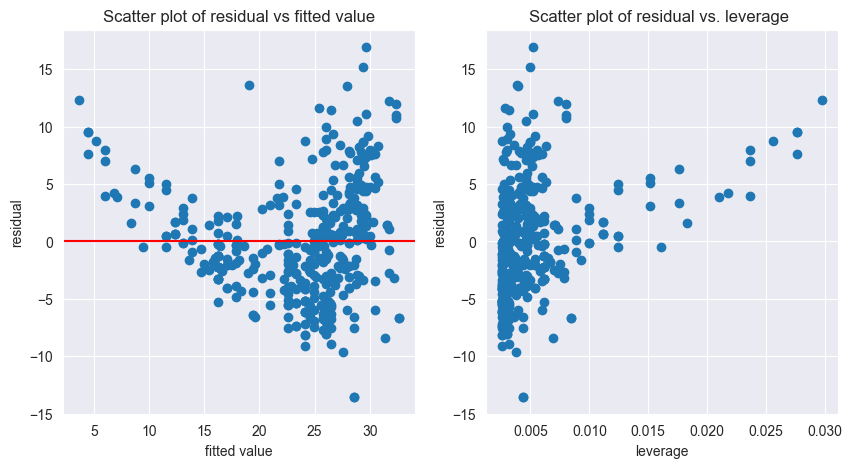

In [5]:
fig, ax = subplots(1,2, figsize=(10,5))

# plot the residual vs. fitted values
ax[0].scatter(model.fittedvalues, model.resid)
ax[0].set_xlabel('fitted value')
ax[0].set_ylabel('residual')
ax[0].set_title('Scatter plot of residual vs fitted value')
# add a y = 0 line for reference in the residual vs. fitted value plot
ax[0].axhline(0, color='red')

# plot the residual vs. leverage plot to identify outliers
influence = model.get_influence()
ax[1].scatter(influence.hat_matrix_diag, influence.resid)
ax[1].set_xlabel('leverage')
ax[1].set_ylabel('residual')
ax[1].set_title('Scatter plot of residual vs. leverage ');

### 8.c

The `residual vs. fitted values` scatter plot shows some patterns, indicating that the true relationship between the predictor `horsepower` and the response `mpg` might not be strictly linear.

The `residual vs. leverage` scatter plot shows that there are some points with high residual have high leverage on the fitted model. This indicates that

## Exercise 9

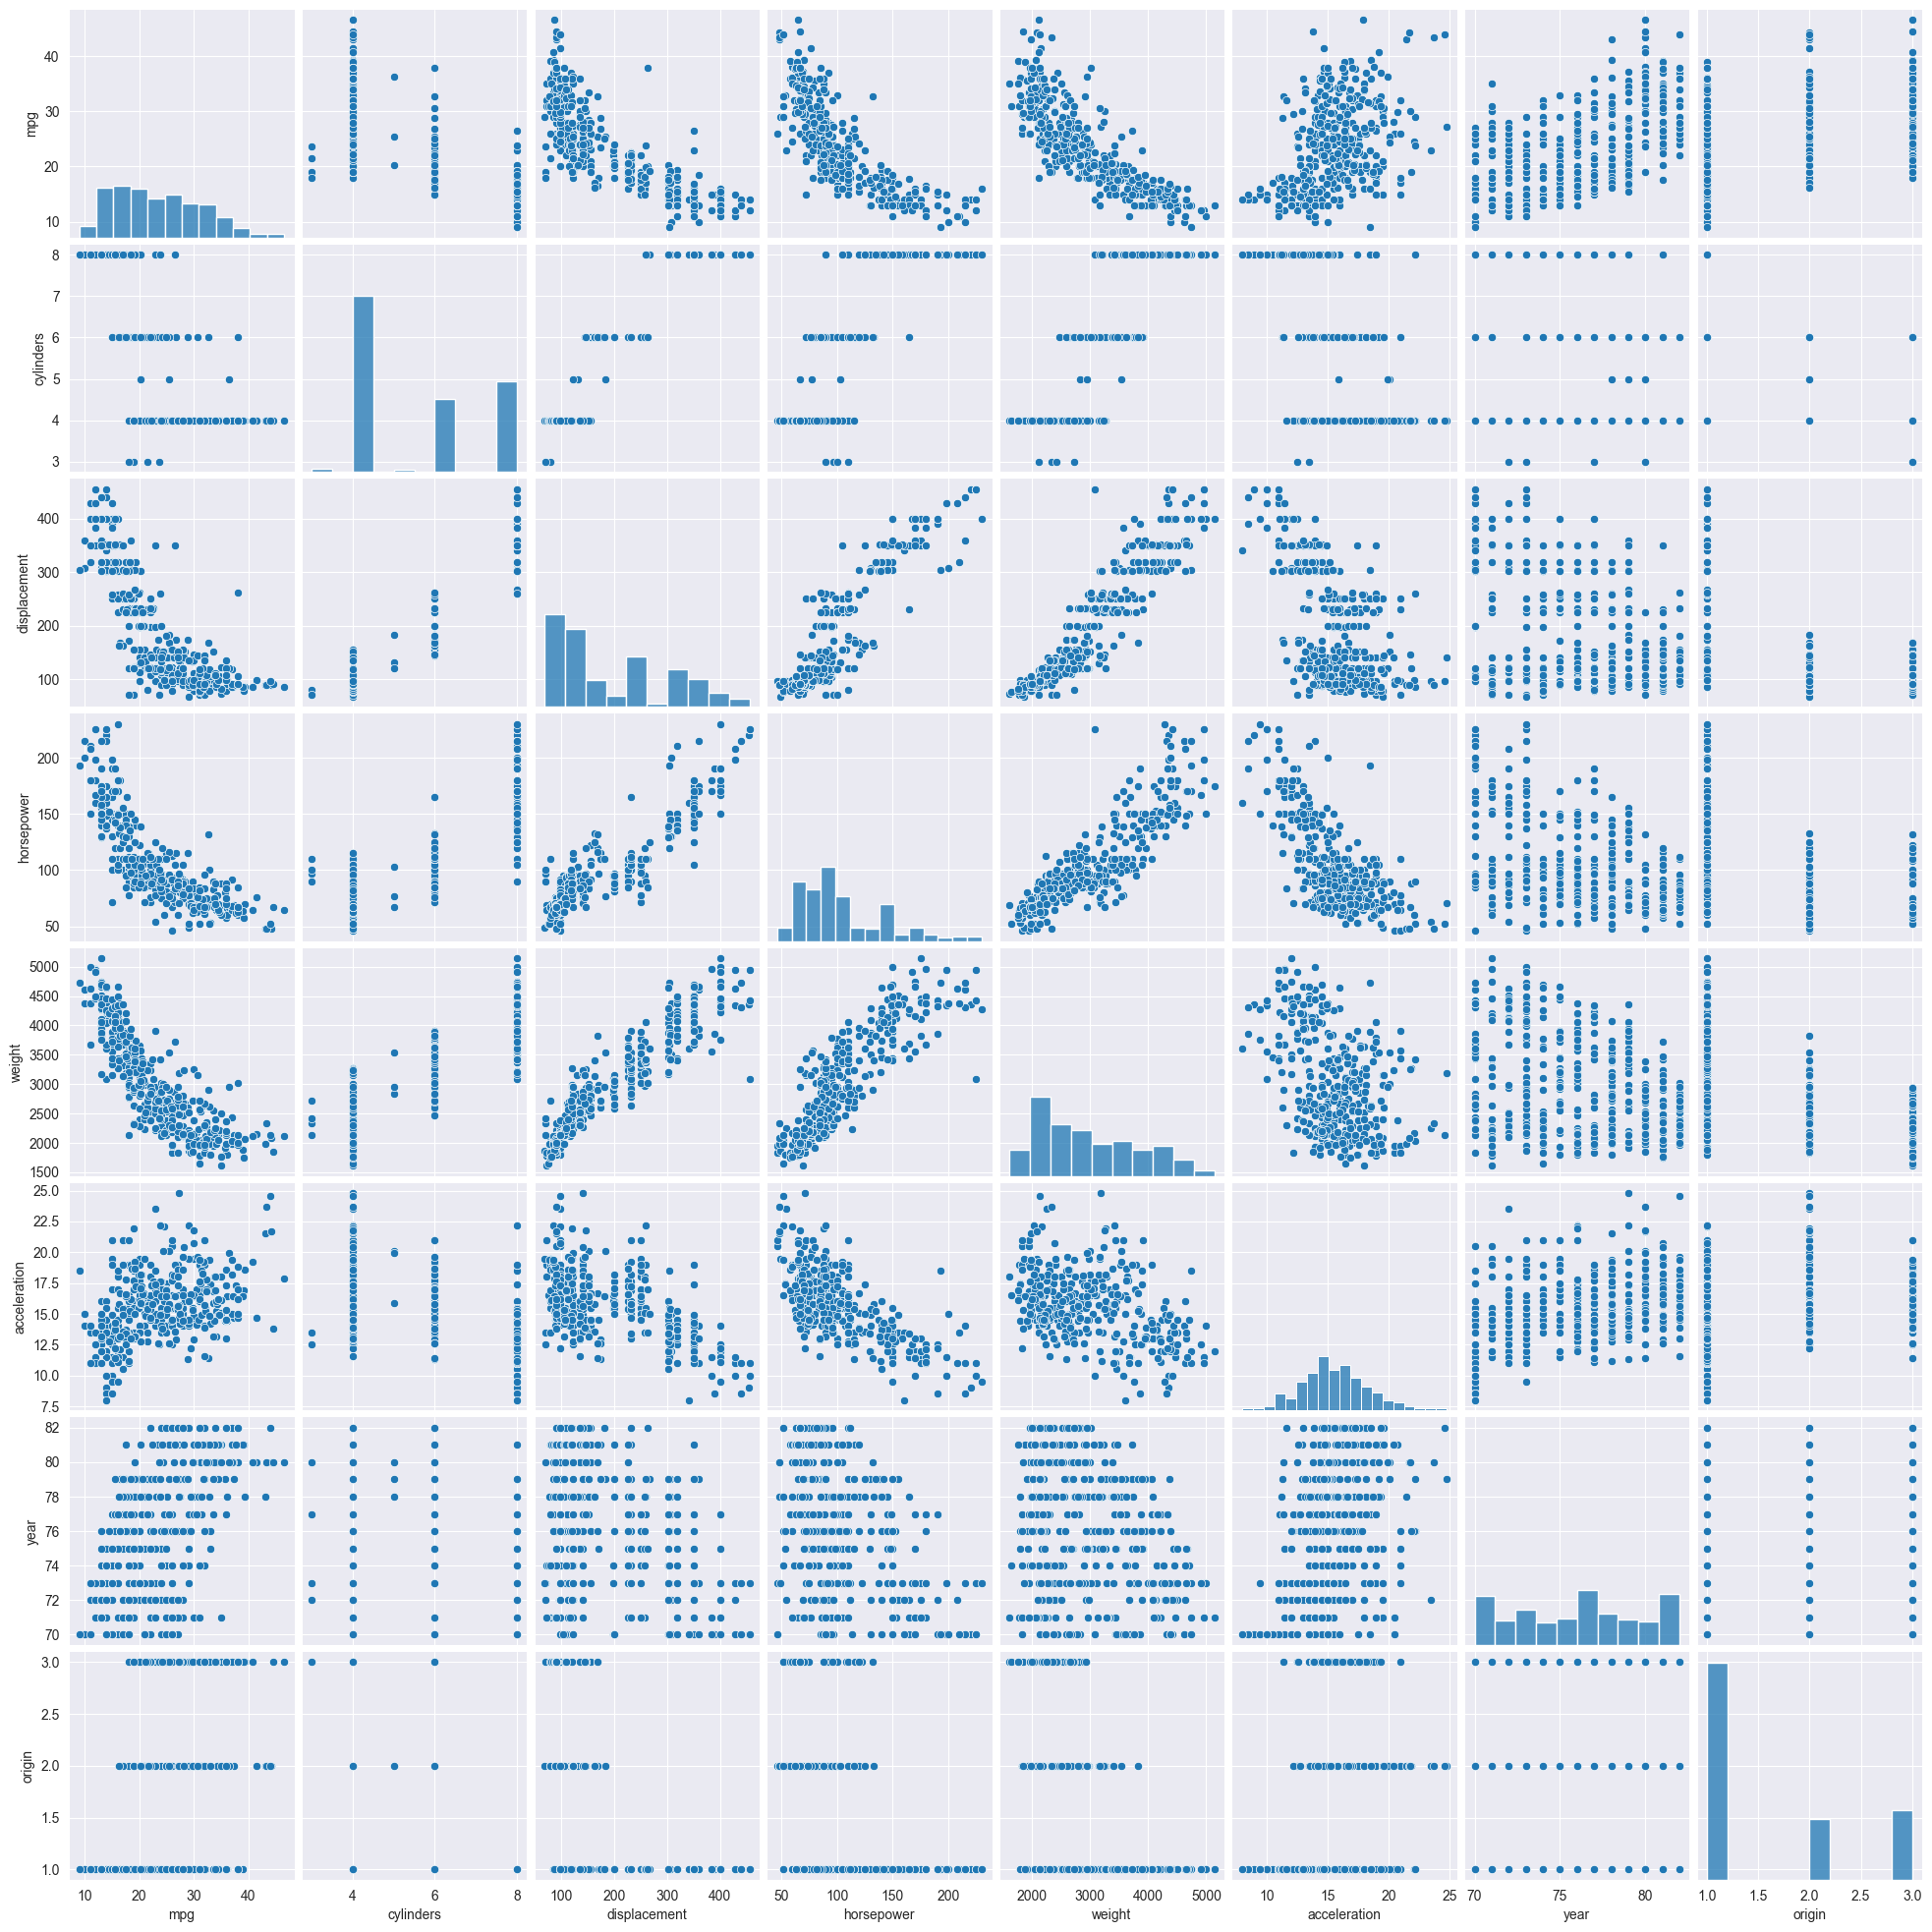

In [6]:
# create a scatterplot matrix which includes all of the variables in the data set
sns.pairplot(data);

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


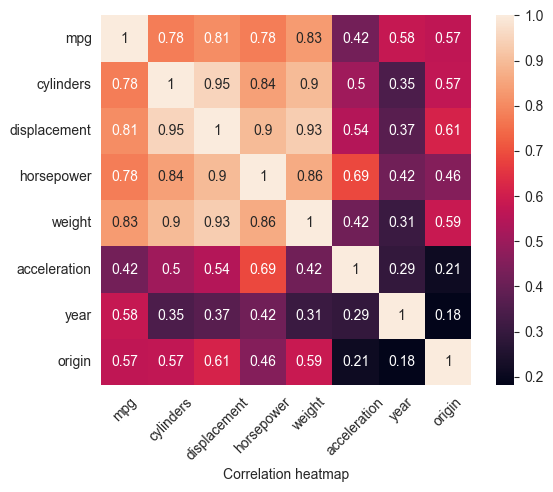

In [7]:
# compute the matrix of correlations between the variables
corr_matrix = data.drop('name', axis=1).corr()

# plot the heatmap to visualize correlation matrix
fig, ax = subplots(1,1)
sns.heatmap(corr_matrix.abs(), annot=True, vmax=1, square=True, ax=ax)
ax.set_xlabel('Correlation heatmap')
plt.xticks(rotation=45)

display(corr_matrix)

### 9.a, 9.b

The scatterplot matrix and the correlation matrix of all the variables of the data set show that some predictors are highly correlated with each other, for instance `horsepower`, `weight`, `displacement` and `cylinders` all have strong positive correlation (above 0.8). This high correlation indicates the presence of multicollinearity, which can be problematic when fitting a regression model that includes all predictors.

Multicollinearity inflates the variance of the estimated coefficients in the regression model, making it hard to determine the individual effect of each predictor on the response `mpg`.

In [8]:
# use the sm.OLS() function to perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors

# extract training data from the data set
predictors = data.columns.drop(['mpg', 'name'])
X = data[predictors]
X = sm.add_constant(X).rename(columns={'const':'intercept'})
Y = data['mpg']

# initiate and fit model
model_1 = sm.OLS(Y, X).fit()

# display model summary and the comparison between the single and multiple linear regression models
display(model_1.summary())
print('\n\nComparing the single and multiple linear regression models')
display(anova_lm(model, model_1))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 16 Sep 2025   Prob (F-statistic):          2.04e-139
Time:                        09:54:09   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



Comparing the single and multiple linear regression models


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,384.0,4252.212530,6.0,5133.703341,77.267308,5.376746e-63


### 9.c

R squared and adjusted R squared values is rather high (~0.8), indicating that 80% of the variance in `mpg` is explained by the model. Compared with the single linear model with `horsepower` as the only predictor (R squared ~ 0.606), this is a significant increase in explained variance. However, as the number of predictors increases, R squared values increases. This fact, in addition to signs of multicollinearity among the predictors in the data, suggest that the increased in R value must not be strictly viewed an improvement in model performance.

The F-statistic value is high (252.4) with a low p-value (2.04e-193). This strongly disputes the null hypothesis that the coefficients of all the predictors, except the intercept, is 0, implying a statistically strong relationship between the predictors and the response `mpg`.

However, compared to the linear model with `horsepower` as the only predictor, the F-statistic value of the multilinear model is lower (599.7 vs. 252.4). This decrease in F-statistic value is probably due to the increase in the number of predictor p: as p increases, unless sum of squares of residuals (SSR) substantially decreases, the variance that cannot be explained by the model per predictor decreases, while the total variance per degree of freedom increases, resulting in a decrease in F.

Now, looking at the result from the comparison between the 2 models - using the statsmodel.api.anova.anova_lm() function, the sum of squares of residuals (SSR) in the multilinear model is lower than that of the single linear model (4252.21 vs. 9385.92). However, this decrease must be weighted against the added degree of freedom of the model (i.e. number of predictors), which can be evaluated using the F-statistic resulting from the comparison. The F-statistic is high (77.267) with a relatively low p-value (5.37e-63), indicates that the addition of predictors significantly increases model fit, despite a diminishing return per predictor.


Given the existence of multicollinearity among the predictors, the predictors in the multilinear regression model might have unstable coefficient estimates, which results in the unstable t-statistic values and their corresponding high p-values. This instability makes it unreliable to predict the individual effect of each predictor on the response `mpg`, although the overall model fit is statistically sound.

The index of the point with the highest leverage is 13


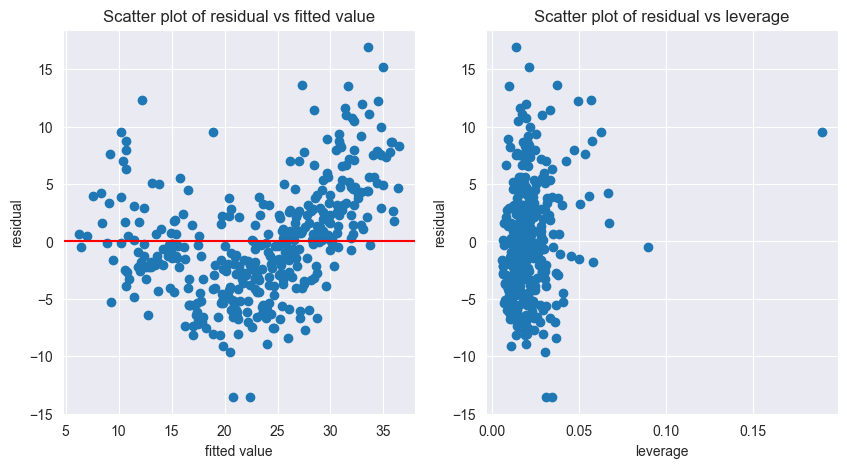

In [9]:
# plot some diagnostic plots of the linear regression fit

fig, ax = subplots(1,2, figsize=(10,5))

# plot the residual vs. fitted value
ax[0].scatter(model_1.fittedvalues, model.resid)
ax[0].set_xlabel('fitted value')
ax[0].set_ylabel('residual')
ax[0].set_title('Scatter plot of residual vs fitted value')
# add a y=0 line
ax[0].axhline(0, color='red')

# plot the leverage vs. residual
influence_1 = model_1.get_influence()
ax[1].scatter(influence_1.hat_matrix_diag, model.resid)
ax[1].set_xlabel('leverage')
ax[1].set_ylabel('residual')
ax[1].set_title('Scatter plot of residual vs leverage');

# print the index of the data point that has the highest leverage
print(f'The index of the point with the highest leverage is {np.argmax(influence_1.hat_matrix_diag)}')

### 9.d

The `residual vs. fitted value` scatter plot shows some patterns, indicating that the true relationship between the predictors and the response `mpg` is not strictly linear.

The `residual vs. leverage` scatter plot shows that most points with high residual values don't necessarily has large influence on the fitted model. The only exception is the point at index 13, which has relatively high residual and leverage value.

In [10]:
# fit some models with interaction terms

# identify predictors with high collinearity based on Variation Inflation Factor (VIF)
vals = [VIF(X, i) for i in range(1, X.shape[1])] # exclude intercept
vifs = pd.DataFrame({'VIF': vals},
                    index=X.columns[1:]) # exclude intercept
display(vifs)

vif_threshold = 2
predictors_collinearity = vifs[vifs['VIF'] >= vif_threshold].index.to_list()

print(f'The predictors with VIF above {vif_threshold} are {predictors_collinearity}')

,VIF
cylinders,10.737535
displacement,21.836792
horsepower,9.943693
weight,10.831260
acceleration,2.625806
year,1.244952
origin,1.772386


The predictors with VIF above 2 are ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']


### 9.e

The Variation Inflation Factor (VIF) show that predictors with high multicollinearity are `cylinders`, `displacements`, `horsepower`, `weight` and `acceleration`. This is in line with the correlation matrix of the predictors.

To mitigate multicollinearity, a few models using different interactive terms among these predictors will be evaluated as follows:
* model_2: `cylinders * displacement * acceleration * horsepower * weight`, `year`, `origin`
* model_3: `cylinders * displacement * acceleration`, `horsepower * weight`, `year`, `origin`

Each interactive term is the product of its component, making its scale significantly larger than the remaining data. To avoid numerical problems, column normalization is performed using the `sklearn.preprocessing.normalize()` function.

In [11]:
def prepare_data(data, predictors, response=None, add_intercept=True, interaction=None, normalize=False, encoding=None):
    """Prepare data from dataframe
    Parameters:
        data (pandas.DataFrame): Dataframe to extract data from
        predictors (list): List of numerical predictors which are columns from data
        response (str): Response variable which is a column from data
        add_intercept (bool): If True, add a column of intercept to the data
        interaction (list[list[str]]): List of interaction variables which are column from data. The format is: ((col1, col2, etc.), (col3,col4,etc.), etc.)
        normalize (bool): If True, normalize the data
        encoding (list): List of categorical predictors to be encoded from data
    Returns:
        If response is None, return a tuple, the first element is the predictor data as a pandas.DataFrame, the second element is the response as a pandas.Series
        Else, return the predictor data as a pandas.DataFrame"""

    # extract predictor data
    X = data[predictors]

    # add intercept
    if add_intercept:
        X.insert(loc=0, column='intercept', value=np.ones(X.shape[0]))

    # create interactive term
    if interaction is not None:
        for term in interaction:
            buf = data[term[0]]
            for col in term[1:]:
                buf = buf.multiply(data[col])
            X.insert(loc=len(X.columns), column=':'.join(term), value=buf)

    # normalize data
    if normalize:
        array = preprocessing.normalize(X, axis=0)
        X = pd.DataFrame(array, columns=X.columns)

    if encoding is not None:
        dummies = pd.get_dummies(data[encoding], prefix=encoding, drop_first=True)
        [X.insert(loc=len(X.columns), column=col, value=dummies[f'{col}'].astype(int)) for col in dummies.columns]

    # return
    if response is not None:
        return X, data[response]
    else:
        return X

# interactive terms
int_2 = [('cylinders', 'displacement', 'acceleration', 'horsepower', 'weight')]
int_3 = [('cylinders', 'displacement', 'acceleration'), ('horsepower', 'weight')]

# prepare data
Xs = [prepare_data(data, predictors=['year', 'origin'], interaction=i, normalize=True)
      for i in [int_2, int_3]]

# fit models
models = [sm.OLS(Y, x).fit() for x in Xs]

In [12]:
data_10 = load_data('Carseats')

# set up predictors and response
# predictors = ['Price', 'Urban', 'US']
X_10, Y_10 = prepare_data(data_10, predictors=['Price'], response='Sales', add_intercept=True, encoding=['Urban', 'US'])

X_10

,intercept,Price,Urban_Yes,US_Yes
0,1.0,120,1,1
1,1.0,83,1,1
2,1.0,80,1,1
3,1.0,97,1,1
4,1.0,128,1,0
...,...,...,...,...
395,1.0,128,1,1
396,1.0,120,0,1
397,1.0,159,1,1
398,1.0,95,1,1


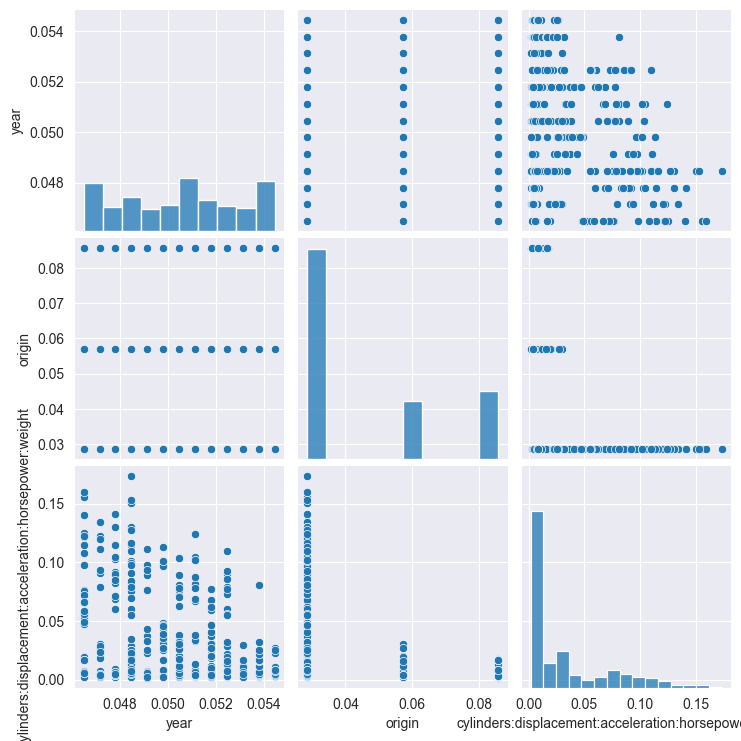

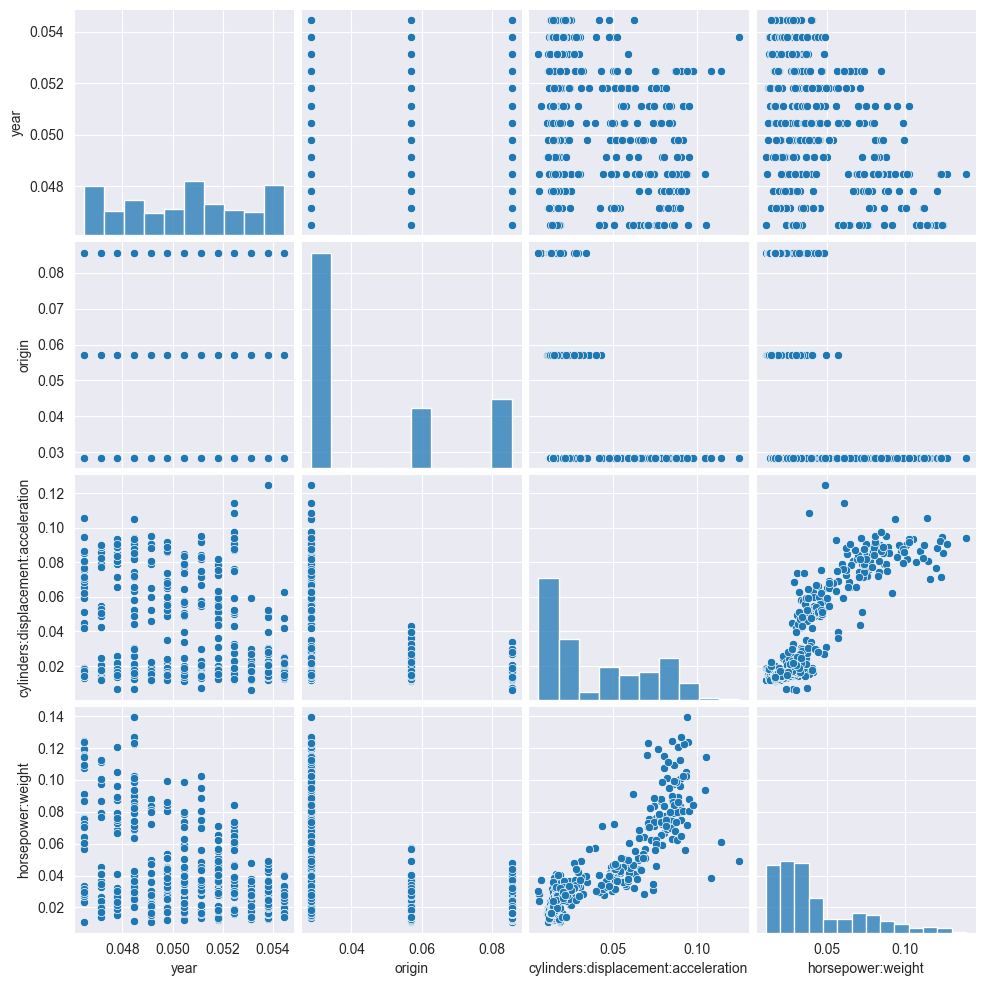

In [13]:
# display scatter pairplots of the different training data to examine multicollinearity
for i in Xs:
    sns.pairplot(i, vars=i.columns[1:])

In [14]:
for i in range(len(models)):
    print(f'Summary of model {i}')
    display(models[i].summary())
    print('*'*50 + '\n'*2)

Summary of model 0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     321.0
Date:                Tue, 16 Sep 2025   Prob (F-statistic):          1.01e-104
Time:                        09:54:10   Log-Likelihood:                -1116.6
No. Observations:                 392   AIC:                             2241.
Df Residuals:                     388   BIC:                             2257.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
intercept                                              -675.5031     95.789     -7.052      0.000    -863.834    -487.172
year                                                   1124.4975     93.585     12.016      0.000     940.501    1308.494
origin                                                   88.7039     10.638      8.339      0.000      67.789     109.619
cylinders:displacement:acceleration:horsepower:weight   -97.3806      6.683    -14.572      0.000    -110.519     -84.242
==============================================================================
Omnibus:                       18.874   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.492
Skew:                           0.431   Prob(JB):                     7.92e-06
Kurtosis:                       3.833   Cond. No.                         57.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**************************************************


Summary of model 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     330.9
Date:                Tue, 16 Sep 2025   Prob (F-statistic):          1.91e-123
Time:                        09:54:10   Log-Likelihood:                -1069.9
No. Observations:                 392   AIC:                             2150.
Df Residuals:                     387   BIC:                             2170.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
intercept                            -508.9093     87.530     -5.814      0.000    -681.003    -336.815
year                                 1067.5907     84.117     12.692      0.000     902.208    1232.973
origin                                 54.2476     10.358      5.237      0.000      33.882      74.613
cylinders:displacement:acceleration   -90.9059     14.379     -6.322      0.000    -119.177     -62.635
horsepower:weight                     -80.1486     14.390     -5.570      0.000    -108.441     -51.856
==============================================================================
Omnibus:                       31.990   Durbin-Watson:                   1.278
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.937
Skew:                           0.532   Prob(JB):                     3.20e-12
Kurtosis:                       4.452   Cond. No.                         67.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**************************************************




In [15]:
# compare model performance. model order: single linear regression, model_2 (interactive term), model_3 (interactive term), model_1 (all variables)
anova_lm(model, *models,  model_1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,388.0,6840.076319,2.0,2545.839552,114.952202,6.231956e-40
2,387.0,5388.354595,1.0,1451.721725,131.099078,2.433134e-26
3,384.0,4252.212530,3.0,1136.142064,34.200121,1.304911e-19


### 9.e

The pairplots of the training data for model_2 show that there are still correlational relationship between the two interactive terms `cylinders * displacement * acceleration` and `horsepower * weight`, while that of model_3 presents no pair-wise correlational relationship among the predictors.

The R squared and adjusted R squared values of `model_2` are 0.713 and 0.711 respectively. Those of `model_3` are 0.774 and 0.771 respectively. This indicates that around 71-77% of variance in `mpg` can be explained by these 2 models. This is an improvement compared to the single linear regression model (i.e. `model`)(R squared ~ 0.6), while a decrease compared to the full model (i.e. `model_1`) (R squared ~ 0.8). Given the fact that the number of predictors positively correlates to the value of R squared, the difference in R squared values among these models could be due to the variation in the number of predictors. The sum of squares of residuals (SSR) follows the same patterns as the R square, consistent with the relationship between R square and SSR.

The F-statistic of these 2 models are substantially large (321.0 and 330.9 respectively) with substantially low p-value (1.01e-104 and 1.91e-123 respectively). This strongly rejects the null hypothesis, indicating a statistically strong correlational relationship between the predictors and the response `mpg`.

The F-statistic values of the comparisons among the models, albeit largely vary, are large with significantly low p-values. This indicates that progressing from the single linear `model` to `model_2` and `model_3`, the increase in the number of predictors is substantially offset by the decrease in SSR such that the factor of explained over total variance still increases. Put differently, progressing from `model` to `model_2` and `model_3`, the gain in explained variance significantly increases with the increase in model complexity (i.e. the number of predictors). However, progressing from `model_3` to `model_1`, this offsetting influence decreases, although still sufficient to make the `model_1` statistically sufficient to estimate response `mpg`. Put differently, progressing from `model_1` to `model_3`, the gain in explained variance decreases relative to the increase in model complexity.

In [16]:
# try a few different transformations of the variables, such as log(X), root(X), square(X)

# transform the predictors
func = [np.log, np.sqrt, np.square]
Xs = []
for f in func:
    buf = data[predictors].copy().apply(func=f)
    buf.insert(loc=0, column='intercept', value=np.ones(data.shape[0]))
    Xs.append(buf)

# fit models
models = [sm.OLS(Y, x).fit() for x in Xs]

for i in range(len(models)):
    print(f'Summary of model {i}')
    display(models[i].summary())
    print('*'*50 + '\n'*2)

Summary of model 0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     306.5
Date:                Tue, 16 Sep 2025   Prob (F-statistic):          6.67e-153
Time:                        09:54:10   Log-Likelihood:                -991.70
No. Observations:                 392   AIC:                             1999.
Df Residuals:                     384   BIC:                             2031.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -66.5643     17.505     -3.803      0.000    -100.982     -32.146
cylinders        1.4818      1.659      0.893      0.372      -1.780       4.743
displacement    -1.0551      1.538     -0.686      0.493      -4.080       1.970
horsepower      -6.9657      1.557     -4.474      0.000     -10.027      -3.905
weight         -12.5728      2.225     -5.650      0.000     -16.948      -8.198
acceleration    -4.9831      1.608     -3.099      0.002      -8.144      -1.822
year            54.9857      3.555     15.465      0.000      47.995      61.976
origin           1.5822      0.508      3.113      0.002       0.583       2.582
==============================================================================
Omnibus:                       40.670   Durbin-Watson:                   1.394
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.138
Skew:                           0.587   Prob(JB):                     2.40e-18
Kurtosis:                       4.894   Cond. No.                     1.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**************************************************


Summary of model 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     275.3
Date:                Tue, 16 Sep 2025   Prob (F-statistic):          2.17e-145
Time:                        09:54:10   Log-Likelihood:                -1009.4
No. Observations:                 392   AIC:                             2035.
Df Residuals:                     384   BIC:                             2067.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -49.7981      9.178     -5.426      0.000     -67.844     -31.752
cylinders       -0.2370      1.538     -0.154      0.878      -3.260       2.786
displacement     0.2258      0.229      0.984      0.326      -0.225       0.677
horsepower      -0.7798      0.308     -2.533      0.012      -1.385      -0.174
weight          -0.6217      0.079     -7.872      0.000      -0.777      -0.466
acceleration    -0.8253      0.834     -0.989      0.323      -2.466       0.815
year            12.7903      0.859     14.891      0.000      11.102      14.479
origin           3.2604      0.768      4.247      0.000       1.751       4.770
==============================================================================
Omnibus:                       40.498   Durbin-Watson:                   1.319
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.517
Skew:                           0.608   Prob(JB):                     4.00e-17
Kurtosis:                       4.773   Cond. No.                     3.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**************************************************


Summary of model 2


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     216.8
Date:                Tue, 16 Sep 2025   Prob (F-statistic):          3.57e-129
Time:                        09:54:10   Log-Likelihood:                -1047.6
No. Observations:                 392   AIC:                             2111.
Df Residuals:                     384   BIC:                             2143.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        1.2080      2.356      0.513      0.608      -3.424       5.840
cylinders       -0.0883      0.025     -3.502      0.001      -0.138      -0.039
displacement   5.68e-05   1.38e-05      4.109      0.000    2.96e-05     8.4e-05
horsepower   -3.621e-05   4.98e-05     -0.728      0.467      -0.000    6.16e-05
weight       -9.351e-07   8.98e-08    -10.416      0.000   -1.11e-06   -7.59e-07
acceleration     0.0063      0.003      2.334      0.020       0.001       0.012
year             0.0050      0.000     14.160      0.000       0.004       0.006
origin           0.4129      0.069      5.971      0.000       0.277       0.549
==============================================================================
Omnibus:                       21.204   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.337
Skew:                           0.431   Prob(JB):                     4.26e-07
Kurtosis:                       4.027   Cond. No.                     1.45e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**************************************************




### 9.f

The three models fitted using transformed predictors show comparable performance to the full model using raw predictors. In particular, the R-squared and adjusted R-squared are high, in the range 79-84%. This indicates that these 3 models can explain around 79-80% of the variance in `mpg`. The F-statistics are sufficiently high (ranging from ~217 to 306) with extremely low p-values, rejecting the null hypothesis.

However, multicollinearity remains a concern, as shown in the high condition number of each model. This suggests that numerically transforming predictors doesn't sufficiently break the correlational relationship among predictors when the transformation still preserves the ordering or scale relationships. So, numerical transformation is not sufficient to resolve multicollinearity.

## Exercise 10

Dataset description: https://intro-stat-learning.github.io/ISLP/datasets/Carseats.html

In [17]:
data_10 = load_data('Carseats')

# set up predictors and response
X_10_a, Y_10 = prepare_data(data_10, predictors=['Price'], response='Sales', add_intercept=True, encoding=['Urban', 'US'])

# fit model
model_10_a = sm.OLS(Y_10, X_10_a).fit()
model_10_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 16 Sep 2025   Prob (F-statistic):           2.39e-23
Time:                        09:54:10   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban_Yes     -0.0219      0.272     -0.081      0.936      -0.556       0.512
US_Yes         1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 10.c

The model has the following form:

$ \hat{Sales} = \hat{\beta_0} + \hat{\beta_1} \times Price + \hat{\beta_2} \times Urban\_Yes + \hat{\beta_3} \times US\_Yes$

$ \hat{Sales} = 13.0435 -0.0545 \times Price -0.0219 \times Urban\_Yes + 1.2006 \times US\_Yes$

Where `Urban_Yes` and `US_Yes` is either 0 or 1.

### 10.b
The coefficient, t-statistic and p-values show the relationship between each predictor and the response. In particular:
* The coefficient for `Urban_Yes` is -0.0219 with a very high p-value (0.936). This means that there is no evidence that store location (rural vs. urban) has any meaningful effect on `Sales`
* The coefficient for `Price` is -0.0545, with a significant t-statistic (-10.389) and low p-value (0.000). This indicates that `Price` has a strong negative association with `Sales`. In particular, holding other variable constant, a decrease of \$1000 in `Price` is associated with an increase of about 55 units of `Sales`. Conversely, an increase of \$1000 in `Price` is expected to reduce `Sales` by about 55 units.
* The coefficient for `US_Yes` is approximately 1.2 with a significant t-statistic (4.635) and a low p-value (0.000). This indicates that this predictor has a statistically significant positive correlation with the response `Sales`. This is a qualitative predictor, whose values are either 0 or 1, signifying if the store is located in the US. It means that, holding other variable constant, stores in the US sell on average 120 more units than those outside the US.

### 10. d
Given the t-statistic and p-values of each predictor, there is strong statistical evidence to reject the null hypothesis for `Price` and `US_Yes`.

In [18]:
# fit a new model using only `Price` and `US_Yes`

# set up predictors and response
X_10_e = prepare_data(data_10, predictors=['Price'], add_intercept=True, encoding=['US'])

# fit model
model_10_e = sm.OLS(Y_10, X_10_e).fit()
model_10_e.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 16 Sep 2025   Prob (F-statistic):           2.66e-24
Time:                        09:54:10   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US_Yes         1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
anova_lm(model_10_e, model_10_a)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,397.0,2420.874462,0.0,NaN,NaN,NaN
1,396.0,2420.834671,1.0,0.03979,0.006509,0.935739


### 10.f

Model (a) has 3 predictors: `Price`, `US_Yes`, `Urban_Yes`. Model (e) has 2 predictors: `Price`, `US_Yes`

The performances of model (a) and model (e) are similar. Their R-squared values are both 0.239, indicating that these two models can explain approximately 23.9% variance in the data. The adjusted R-squared, which accounts for the number of predictors, is 0.234 for Model (a) and is 0.235 for Model (e), suggesting a marginal improvement in parsimony with fewer predictors.

The difference in sum of squared residuals (`ss_diff`) between the 2 models is negligible, 0.03979. Moreover, the F-statistics from the nested model comparison is rather low (0.006509) with a high p-value (0.935739), indicating that the additional explanatory power provided by including the predictor `Urban_Yes` in Model (a) is statistically insignificant. This finding is consistent with the observation that predictor `Urban_Yes` has a very high p-value in Model (a) (0.936), suggesting it is not a significant predictor to begin with.

These results collectively suggest that removing the predictor `Urban_Yes` doesn't significantly worsen the model's explanatory power and result in a parsimonious model without any meaningful loss of fit.

In [20]:
# Using the model (e), obtain 95% confidence intervals for the coefficients
model_10_e.conf_int(alpha=0.05)

,0,1
intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US_Yes,0.69152,1.707766


### 10.h

Since Model (e) is a multilinear model, it is impossible to present the response against predictors in a 2D scatter plot to detect outliers and high leverage observations. Although pairplots of predictors don't exhaustively reveal all high leverage observations because it can show the relationship between 2 predictors at a time, they can still provide a decent first glance into the data.

Outliers are observations with irregular response values. These points are distributed far from the regression plane and have high residuals. So, they can be best observed from the residual plot. High leverage observations are those with irregular predictor values, unusual in the multidimensional feature space. High leverage points can be observed from the leverage scatter plot using the attribute *statsmodels.regression.linear_model.OLSResults.get_influence().hat_matrix_diag*.

The set of **Pairplots** reveals that there are outliers and observations with high leverage. In particular:
* In the plot `Price` against `US_Yes`, there are some points with extreme `Price` values, both in the higher and lower end, in both the `US_Yes=0` and `US_Yes=1` categories. These unusual points in the predictor space indicate observations with high leverage.
* Additionally, in the plot `Sales` against `Price` there are some observations that deviate significantly from the general linear trend line, indicating potential outliers.

The **Residual** plot doesn't exhibit any patterns.

The **Leverage** indicates the presence of some observations with significantly higher leverage (above 0.04) compared to the majority of the data points, which are clustered at lower leverage values. The residual value of these observations, however, is rather small compared to others with lower leverage. Therefore, while these observations have high leverage, they don't significantly skew the model far from the true relationship between the predictors and response.

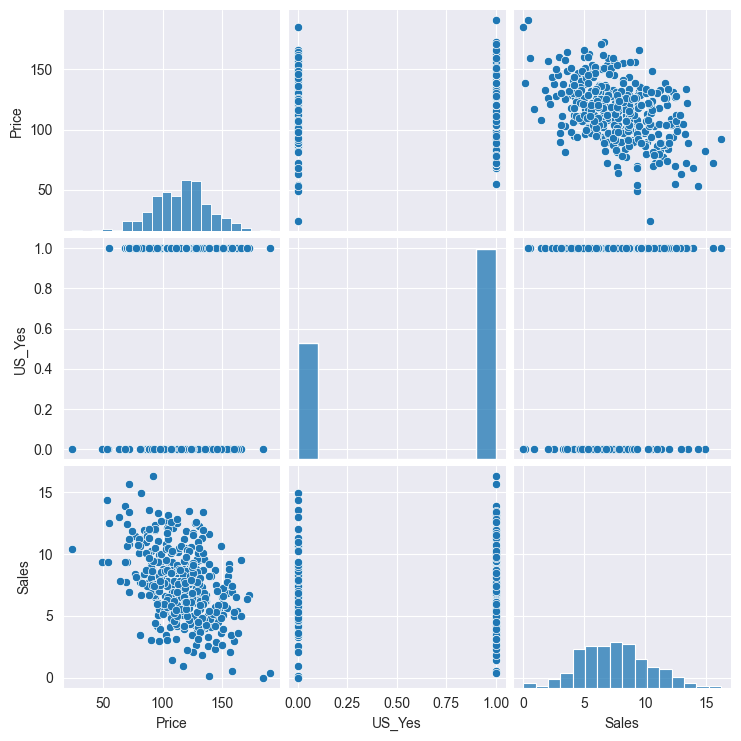

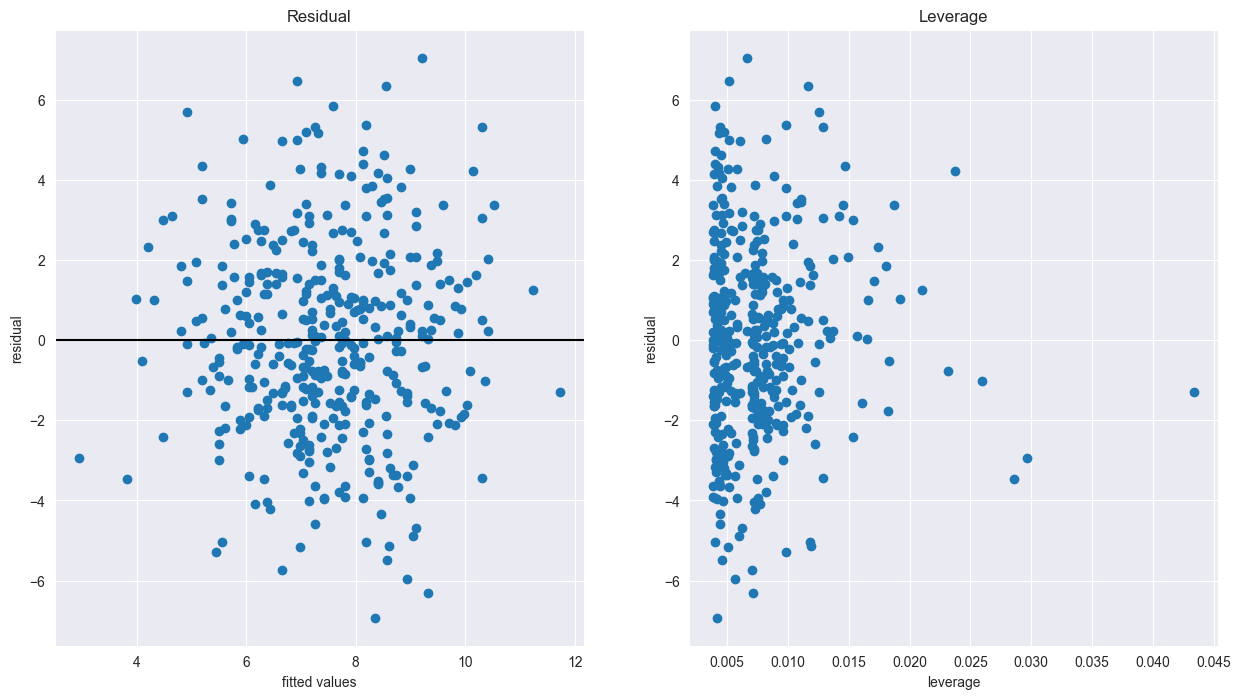

In [21]:
# pairplots
buf_data = X_10_e.copy(deep=True).drop(columns=['intercept'])
buf_data.insert(buf_data.shape[1], column='Sales', value=Y_10)
sns.pairplot(buf_data)

# plot residuals and leverage
influence_2 = model_10_e.get_influence()

# generate a figure
fig, ax = plt.subplots(1,2, figsize=(15,8))

# outliers: irregular y
ax[0].scatter(model_10_e.fittedvalues, model_10_e.resid)
ax[0].set_xlabel('fitted values')
ax[0].set_ylabel('residual')
ax[0].set_title('Residual')
ax[0].axhline(0, color='k')

# high leverage observations: irregular x
ax[1].scatter(influence_2.hat_matrix_diag, influence_2.resid)
ax[1].set_xlabel('leverage')
ax[1].set_ylabel('residual')
ax[1].set_title('Leverage');

## Exercise 11

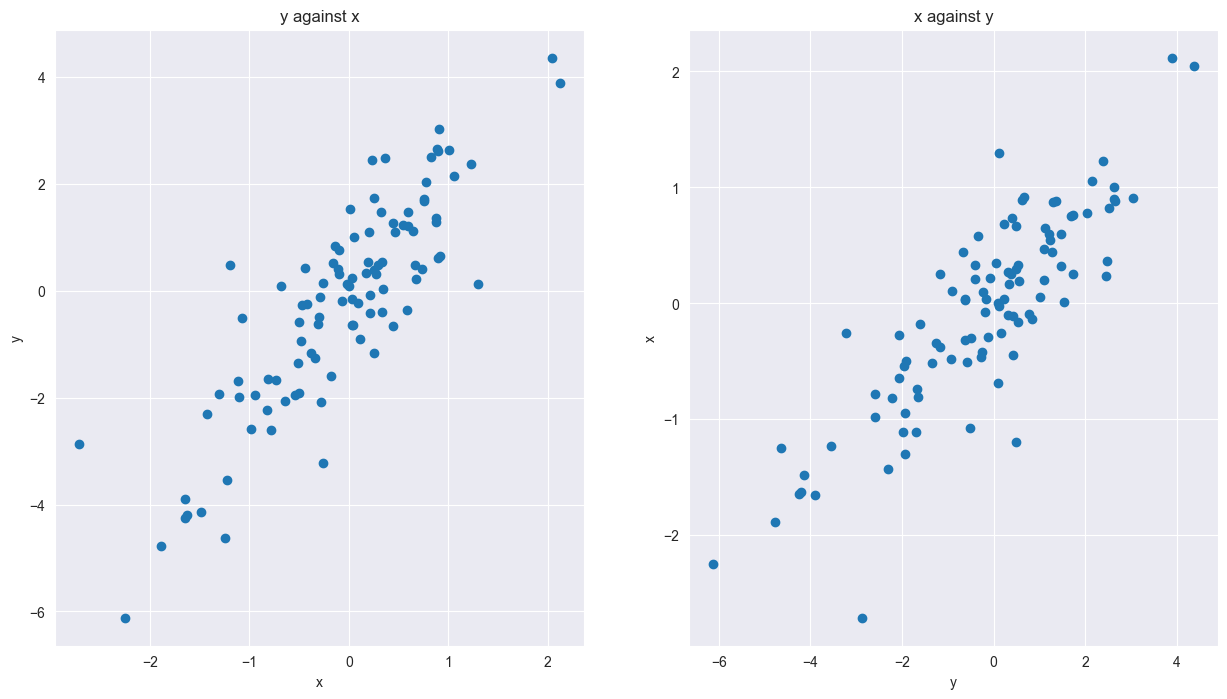

In [22]:
# generate predictor x and response y per instructions
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

# plot the response y against predictor x; plot the predictor x against response y
fig, ax = plt.subplots(1,2, figsize=(15,8))

ax[0].scatter(x, y)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('y against x')

ax[1].scatter(y, x)
ax[1].set_xlabel('y')
ax[1].set_ylabel('x')
ax[1].set_title('x against y');

In [23]:
# simple linear regression of y onto x without an intercept
model_11_a = sm.OLS(y, x).fit()
model_11_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Tue, 16 Sep 2025   Prob (F-statistic):                    6.23e-31
Time:                        09:54:11   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9762      0.117     16.898      0.000       1.744       2.208
==============================================================================
Omnibus:                        1.376   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                0.847
Skew:                           0.121   Prob(JB):                        0.655
Kurtosis:                       3.381   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 11.a

The simple linear regression model shows a strong fit to the data. The (uncentered) R-squared value is 0.743, indicating that the model can explain approximately 74.3% of the variance in the response **y**.

The F-statistic is high (285.6), with a significantly low p-value (6.23e-31), strongly rejects the null hypothesis that there is no relationship between the predictor **x** and response **y**.

The coefficient  for **x** is $\hat{\beta}=1.9762$, which is quite close to the value 2 used to generate the data. The standard error is 0.117. The 95% confidence interval is between 1.744 and 2.208, which lies sufficiently far from 0 and contains the true parameter. Additionally, the t-statistic is significantly large (16.898) with a p-value of 0.000, further reinforcing that the coefficient **x** $\hat{\beta}$ is significantly different from 0.

In summary, the model offers a good fit for response **y**. It can account for a large portion of the variance in **y**. The null hypothesis $H_0: \beta=0$ is strongly rejected by the significantly high F-statistic value (with very low p-value) and sufficiently high t-value (with low p-value), indicating that there is a relationship between the predictor **x** and response **y**.

In [24]:
# simple linear regression of y onto x without an intercept
model_11_b = sm.OLS(x, y).fit()
model_11_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Tue, 16 Sep 2025   Prob (F-statistic):                    6.23e-31
Time:                        09:54:11   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3757      0.022     16.898      0.000       0.332       0.420
==============================================================================
Omnibus:                       13.156   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.596
Skew:                          -0.528   Prob(JB):                     1.24e-05
Kurtosis:                       5.075   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 11.b

The simple linear regression model shows a strong fit to the data. The (uncentered) R-squared value is 0.743, indicating that the model can explain approximately 74.3% of the variance in the response **x**.

The F-statistic is high (285.6), with a significantly low p-value (6.23e-31), strongly rejects the null hypothesis that there is no relationship between the predictor **y** and response **x**.

The coefficient  for **y** is $\hat{\beta}=0.3757$, which is quite close to the 0.5 - the inverse of the value used to generate the data. The standard error is 0.022. The 95% confidence interval is between 0.332 and 0.420, which lies sufficiently far from 0. Additionally, the t-statistic is significantly large (16.898) with a p-value of 0.000, further reinforcing that the coefficient for **y** $\hat{\beta}$ is significantly different from 0.

In summary, the model offers a good fit for response **x**. It can account for a large portion of the variance in **x**. The null hypothesis $H_0: \beta=0$ is strongly rejected by the significantly high F-statistic value (with very low p-value) and sufficiently high t-value (with low p-value), indicating that there is a relationship between the predictor **y** and response **x**.

### 11.c

The result in (a) and (b) are compatible, even when the roles of x and y are swapped. In particular, both models have (uncentered) R-squared value of 0.743, being able to account for 74.3% of the variance in the response. They both have F-statistic value of 285.6, with a significantly low p-value (6.23e-31). Additionally, the t-statistic value of both models equal 16.898. The coefficient of model a is 1.9762, which is close to the value 2 used to generate y from x. The coefficient of model b is 0.3757, which is close to 0.5 - the inverse of the value 2 used to generate y from x.

### 11.d

Confirm numerically that the t-statistic can be written as:

$$
\frac{(\sqrt{n - 1}) \sum_{i=1}^{n} x_i y_i}{\sqrt{(\sum_{i=1}^{n} x_i^2)(\sum_{i'=1}^{n} y_{i'}^2) - (\sum_{i'=1}^{n} x_{i'}y_{i'})^2}}
$$

The t-statistic equals to 16.898 when calculated using this formula (see code cell below). This is the t-statistic for both models (a) and (b).

### 11.e

In the formula of t-statistic from (d), the role of x and y are interchangeable. So, the t-statistic for the regression of y onto x is the same as the t-statistic for the regression of x onto y. This is confirmed by the value of t-statistic of model (a) and model (b), as well as the value calculated using the formula.

In [25]:
# calculate t-statistic using the formula in 11.d
t_numerator = np.sqrt(x.shape[0]-1) * np.sum(x * y)
t_denominator = np.sqrt(np.sum(x**2) * np.sum(y**2) - (np.sum(x*y)**2))
t_statistic = t_numerator / t_denominator
print(f'Using the formula in (d), t-statistic = {t_statistic}')

Using the formula in (d), t-statistic = 16.898417063035094


In [26]:
# fit simple regression model of y onto x with an intercept
x_f = np.append(np.ones((x.shape[0],1)), np.reshape(x, (x.shape[0], 1)), axis=1)
model_11_f_1 = sm.OLS(y, x_f).fit()
print(f'Performance of simple regression model of y onto x with an intercept')
display(model_11_f_1.summary())

# fit simple regression model of x onto y with an intercept
y_f = np.append(np.ones((y.shape[0],1)), np.reshape(y, (y.shape[0], 1)), axis=1)
model_11_f_2 = sm.OLS(x, y_f).fit()
print('\n'*2 + '*'*50 + '\n'*2)
print(f'Performance of simple regression model of x onto y with an intercept')
display(model_11_f_2.summary())

Performance of simple regression model of y onto x with an intercept


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Tue, 16 Sep 2025   Prob (F-statistic):           1.74e-30
Time:                        09:54:11   Log-Likelihood:                -141.06
No. Observations:                 100   AIC:                             286.1
Df Residuals:                      98   BIC:                             291.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0760      0.101     -0.756      0.451      -0.276       0.124
x1             1.9686      0.118     16.734      0.000       1.735       2.202
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



**************************************************


Performance of simple regression model of x onto y with an intercept


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Tue, 16 Sep 2025   Prob (F-statistic):           1.74e-30
Time:                        09:54:11   Log-Likelihood:                -58.325
No. Observations:                 100   AIC:                             120.6
Df Residuals:                      98   BIC:                             125.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0095      0.044      0.216      0.829      -0.078       0.097
x1             0.3763      0.022     16.734      0.000       0.332       0.421
==============================================================================
Omnibus:                       13.123   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.501
Skew:                          -0.528   Prob(JB):                     1.30e-05
Kurtosis:                       5.070   Cond. No.                         1.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 11.f

When perform a simple linear regression with an intercept the t-statistic of the coefficient $\beta_1$ of:
* the model of y onto x is 16.734.
* the model of x onto y is 16.734.

The result shows that when regression is performed with an intercept, the t-statistic for $H_0: \beta_1 = 0$ is the same for the regression of y onto x as it is for the regression of x onto y.

## Exercise 12

### 12.a

The coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X when $|\frac{x_i}{y_i}|=1$. In this case, $|\hat{\beta}|=1$

In [27]:
# coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X
x_12_b = rng.normal(size=100)
y_12_b = 2 * x_12_b + rng.normal(size=100)

model_12_b1 = sm.OLS(y_12_b, x_12_b).fit()

model_12_b2 = sm.OLS(x_12_b, y_12_b).fit()

print(f'Coefficient estimate for the regression model of y onto x: {model_12_b1.params}')
print(f'Coefficient estimate for the regression model of x onto y: {model_12_b2.params}')

Coefficient estimate for the regression model of y onto x: [2.0958372]
Coefficient estimate for the regression model of x onto y: [0.39788356]


In [28]:
# coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X
x_12_c = rng.normal(size=100)
y_12_c = -x_12_c

model_12_c1 = sm.OLS(y_12_c, x_12_c).fit()

model_12_c2 = sm.OLS(x_12_c, y_12_c).fit()

print(f'Coefficient estimate for the regression of y onto x: {model_12_c1.params}')
print(f'Coefficient estimate for the regression of x onto y: {model_12_c2.params}')

Coefficient estimate for the regression of y onto x: [-1.]
Coefficient estimate for the regression of x onto y: [-1.]


## Question 13

In [104]:
# Generate data
rng = np.random.default_rng(1)
x_13 = rng.normal(loc=0, scale=1, size=100)
eps_a = rng.normal(loc=0, scale=0.25, size=100)
y_13_a = -1 + 0.5 * x_13 + eps_a

### 13.c
Vector Y has length 100.

$\beta_0 = -1$

$\beta_1 = 0.5$

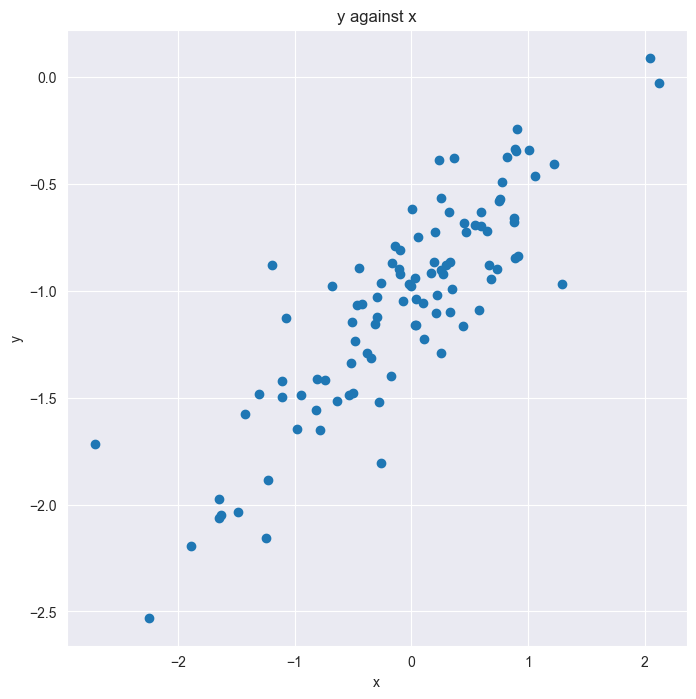

In [105]:
# create a scatter plot of y against x
fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.scatter(x_13, y_13_a)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('y against x');

### 13.d

The plot y against x reveals a positive linear relationship between the predictor x and the response y. As x increases, so does y.

The points are closely distributed along a straight line. The variance in the data is relatively low enough to not distort the linear relationship between x and y, granting the relationship line perceivable in the scatter plot.

The scatter plot shows that the line of fit has a slope of approximately 0.5, and a y-intercept centered around $y=-1$. These figures align with the values of coefficients $\beta_0$ and $\beta_1$ used to generate y from x.

In [106]:
# fit a least squares line to predict y using x

# create the predictor matrix, add constant to the predictor matrix
x_13_a = np.insert(x_13.reshape(x_13.shape[0], 1), 0, np.ones(x_13.shape), axis=1)

model_13_a = sm.OLS(y_13_a, x_13_a).fit()
display(model_13_a.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Wed, 17 Sep 2025   Prob (F-statistic):           1.74e-30
Time:                        14:34:52   Log-Likelihood:                -2.4306
No. Observations:                 100   AIC:                             8.861
Df Residuals:                      98   BIC:                             14.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0190      0.025    -40.537      0.000      -1.069      -0.969
x1             0.4921      0.029     16.734      0.000       0.434       0.551
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 13.e

The obtained least squares linear model offers a sufficiently high explainability power for the response **y** and accurately captures the correlation between the predictor **x** and response **y**.

The model demonstrates strong explanatory power and high statistical significance. In particular:
* The R squared values is 0.741, indicating that the model can explain 74.1% of the variance in the response **y**.
* The F-statistic value is high (280) and has a low p-value (1.74e-30). The t-statistic values of the 2 coefficients $\hat{\beta_0}$ and $\hat{\beta_1}$ are far from 0 (-40.537 and 16.734 respectively) with low p-values (virtually 0). Furthermore, the respective confidence interval of these two coefficients don't contain the value 0. These signs strongly reject the null hypothesis that $\hat{\beta_i} = 0$.

The estimated coefficients of the model are remarkably close to their true values:
* $\hat{\beta_0} = -1.0190$, which is relatively close to the true value -1. Its 95% confidence interval is \[-1.069, -0.969], which include the true value -1.
* Similarly, $\hat{\beta_1} = 0.4921$, which is relatively close to the true value 0.5. Its 95% confidence interval is \[0.434, 0.551], which include the true value 0.5.

The values of $\hat{\beta_0}$ and $\hat{\beta_1}$ being close $\beta_0$ and $\beta_1$ respectively indicates that while the model accounts is susceptible to variance in the response **y**, since the variance is relatively low, it doesn't significantly divert the model from capturing the true relationship between the predictor and the response **y**.

### 13.f

In the scatter plot of y against x, the least squares line and the population regression line are very close to one another, confirming that the model accurately captures the relationship between predictor **x** and response **y**.

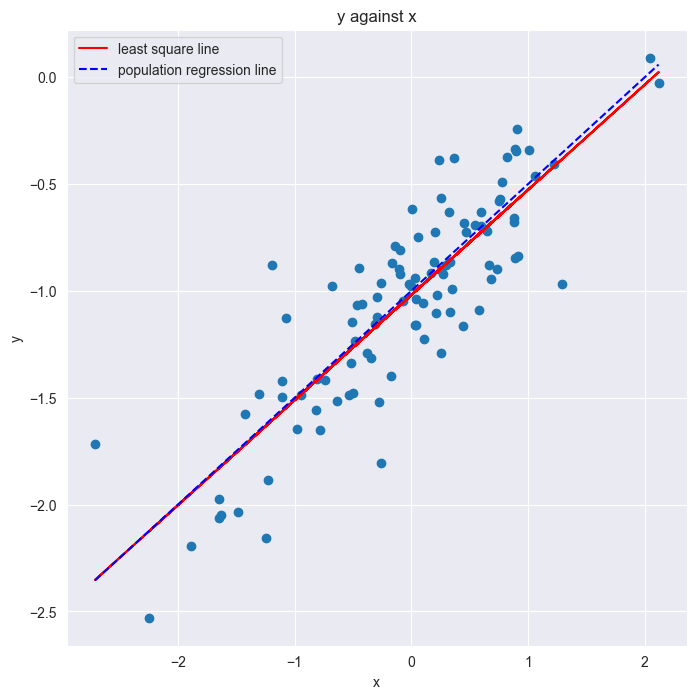

In [107]:
def plot_scatter_simple_linear(x, y, bi_estimate=None, bi_true=None, subplot=None):
    """
    Plot a scatter plot of y against x.
    Parameters:
        x (np.array): a 1D vector of x values
        y (np.array): a 1D vector of y values
        bi_estimate (list[float, float]): the estimated values of b0 and b1
        bi_true (list[float, float]): the true values of b0 and b1
        subplot (tuple [Figure, Axes]): the subplot number
    Return:
        Figure, Axes (tuple [Figure, Axes]): figure and axes objects
    """
    if subplot is None:
        fig, ax = plt.subplots(1,1, figsize=(8,8))
    else:
        fig, ax = subplot

    # scatter plot of x and y
    ax.scatter(x, y)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('y against x')

    # least squares line
    if bi_estimate is not None:
        y_estimate = bi_estimate[0] + bi_estimate[1] * x
        ax.plot(x, y_estimate, color='r', label='least square line')

    # population regression line
    if bi_true is not None:
        x_min = x.min(axis=0)
        x_max = x.max(axis=0)
        x_vals = np.linspace(x_min, x_max, x.shape[0])
        y_vals = bi_true[0] + bi_true[1] * x_vals
        ax.plot(x_vals, y_vals, color='b', linestyle='--', label='population regression line')

    ax.legend()

    return fig, ax

# plot the least squares line and the population regression line on the scatter plot of y against x
bi_true = (-1, 0.5)
bi_estimate = (-1.0190, 0.4921)
plot_scatter_simple_linear(x_13, y_13_a, bi_estimate=bi_estimate, bi_true=bi_true);

In [108]:
# fit a polynomial regression model by adding the quadratic term x^2.

# create predictor matrix X: constant, x, x^2
x_13_g = np.insert(x_13.reshape(x_13.shape[0], 1), 0, np.ones(x_13.shape), axis=1)
x_13_square = x_13 ** 2
x_13_g = np.insert(x_13_g, x_13_g.shape[1], x_13_square, axis=1)

model_13_g = sm.OLS(y_13_a, x_13_g).fit()
display(model_13_g.summary())

print('\n'*2 + '*'*50 + '\n'*2 + f'Comparing simple linear regression and polynomial regression models')
display(anova_lm(model_13_a, model_13_g))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     138.6
Date:                Wed, 17 Sep 2025   Prob (F-statistic):           3.66e-29
Time:                        14:35:06   Log-Likelihood:                -2.4293
No. Observations:                 100   AIC:                             10.86
Df Residuals:                      97   BIC:                             18.67
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0182      0.030    -34.186      0.000      -1.077      -0.959
x1             0.4916      0.032     15.562      0.000       0.429       0.554
x2            -0.0012      0.023     -0.052      0.959      -0.046       0.044
==============================================================================
Omnibus:                        1.338   Durbin-Watson:                   2.197
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                0.814
Skew:                           0.119   Prob(JB):                        0.666
Kurtosis:                       3.372   Cond. No.                         2.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



**************************************************

Comparing simple linear regression and polynomial regression models


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,98.0,6.146642,0.0,NaN,NaN,NaN
1,97.0,6.146471,1.0,0.00017,0.002688,0.958757


### 13.g

The addition of the quadratic term **$x^2$** offers no meaningful improvement to the model.

The quadratic term **$x^2$** doesn't improve the explanatory power of the model.
* The R squared value of the polynomial regression model is 0.741, indicating that the model can account for 74.1% of the variance in the response **y**. This R squared value equals that of the simple linear model, indicating that there is no improvement in the explanatory power of the model with the added quadratic term **$x^2$**.
* The difference in sum of residual square between the polynomial regression model and the simple linear regression model is very insignificant (0.00017), indicating that the addition of the quadratic term **$x^2$** doesn't significantly improve the estimation of the response **y**. Furthermore, the F-statistic of the nested model comparison is infinitesimal (0.002688) with a very high p-value (0.958757). This indicates that moving from the simple linear regression to the polynomial regression model, there is no statistically significant increase in explained variance brought about by the addition of the quadratic term **$x^2$**.

Additionally, there is no correlation between the quadratic term **$x^2$** and the response **y**
* The coefficient of **$x^2$** is -0.0012. The t-statistic value is quite close to 0 (-0.052) with a high p-value (0.959). Additionally, the 95% confidence interval of the coefficient of **$x^2$** is \[-0.046, 0.044], which include the value 0. These signs indicate that there is no statistically significant relationship between the quadratic term **$x^2$** and the response **y**.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     1437.
Date:                Wed, 17 Sep 2025   Prob (F-statistic):           2.33e-60
Time:                        14:43:38   Log-Likelihood:                 81.115
No. Observations:                 100   AIC:                            -158.2
Df Residuals:                      98   BIC:                            -153.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0104      0.011    -92.684      0.000      -1.032      -0.989
x1             0.4835      0.013     37.910      0.000       0.458       0.509
==============================================================================
Omnibus:                        0.201   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.904   Jarque-Bera (JB):                0.371
Skew:                           0.067   Prob(JB):                        0.831
Kurtosis:                       2.733   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

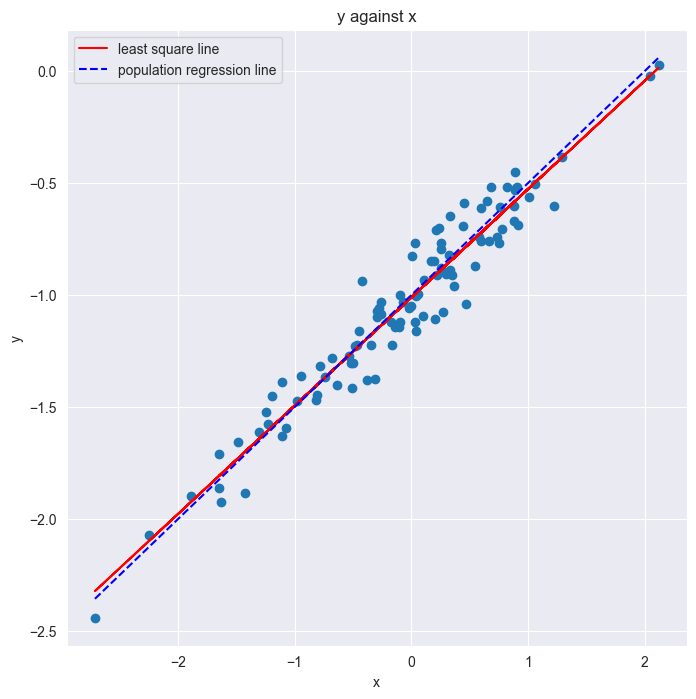

In [113]:
# repeat a-f with less noise in the data
eps_h = rng.normal(loc=0, scale=0.1, size=100)
y_13_h = -1 + 0.5 * x_13 + eps_h

# fit a least squares line to predict y using x
model_13_h = sm.OLS(y_13_h, x_13_a).fit()
display(model_13_h.summary())

bi_true = (-1, 0.5)
bi_estimate = model_13_h.params
plot_scatter_simple_linear(x_13, y_13_h, bi_estimate=bi_estimate, bi_true=bi_true);

### 13.h

By reducing the noise in the response **y**, the obtained least squares linear model has better explainability power for the response **y** and captures more accurately the correlation between the predictor **x** and response **y**

The model demonstrates strong explanatory power and high statistical significance. In particular:
* The R squared values is 0.936, indicating that the model can explain 93.6% of the variance in the response **y**. This is an improvement compared to the simple linear model where there is more noise in the response **y** (R squared values equals 0.741).
* The F-statistic value is high (1437) and has a low p-value (2.33e-60). The t-statistic values of the 2 coefficients $\hat{\beta_0}$ and $\hat{\beta_1}$ are far from 0 (-92.684 and 37.910 respectively) with low p-values (virtually 0). Furthermore, the respective confidence interval of these two coefficients don't contain the value 0. These signs strongly reject the null hypothesis that $\hat{\beta_i} = 0$.

The estimated coefficients of the model are remarkably close to their true values:
* $\hat{\beta_0} = -1.0104$, which is relatively close to the true value -1. Its 95% confidence interval is \[-1.032, -0.989], which include the true value -1.
* Similarly, $\hat{\beta_1} = 0.4935$, which is relatively close to the true value 0.5. Its 95% confidence interval is \[0.458, 0.509], which include the true value 0.5.

The values of $\hat{\beta_0}$ and $\hat{\beta_1}$ being close $\beta_0$ and $\beta_1$ respectively indicates that while the model accounts is susceptible to variance in the response **y**, since the variance is relatively low, it doesn't significantly divert the model from capturing the true relationship between the predictor and the response **y**.

In the scatter plot of y against x, the least squares line and the population regression line are very close to one another, confirming that the model accurately captures the relationship between predictor **x** and response **y**.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     66.38
Date:                Wed, 17 Sep 2025   Prob (F-statistic):           1.23e-12
Time:                        15:00:17   Log-Likelihood:                -69.259
No. Observations:                 100   AIC:                             142.5
Df Residuals:                      98   BIC:                             147.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0368      0.049    -21.143      0.000      -1.134      -0.940
x1             0.4675      0.057      8.147      0.000       0.354       0.581
==============================================================================
Omnibus:                        0.786   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.675   Jarque-Bera (JB):                0.841
Skew:                           0.066   Prob(JB):                        0.657
Kurtosis:                       2.571   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

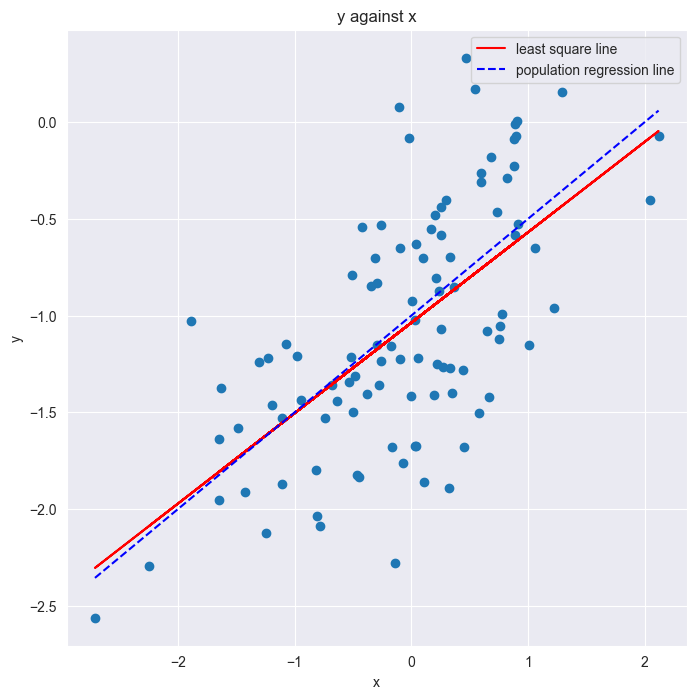

In [116]:
# repeat a-f with more noise in the data
eps_i = rng.normal(loc=0, scale=0.5, size=100)
y_13_i = -1 + 0.5 * x_13 + eps_i

# fit a least squares line to predict y using x
model_13_i = sm.OLS(y_13_i, x_13_a).fit()
display(model_13_i.summary())

bi_true = (-1, 0.5)
bi_estimate = model_13_i.params
plot_scatter_simple_linear(x_13, y_13_i, bi_estimate=bi_estimate, bi_true=bi_true);

### 13.i

By increasing the noise in the response **y**, the obtained least squares linear model has poorer explainability power for the response **y** and captures less accurately the correlation between the predictor **x** and response **y**

The model demonstrates less explanatory power and less statistical significance. In particular:
* The R squared values is 0.404, indicating that the model can explain 40.4% of the variance in the response **y**. This is a decrease compared to the simple linear model in part **a** where there is less noise in the response **y** (R squared values equals 0.741).
* The F-statistic value is high (66.38) and has a low p-value (1.23e-12). However, it is lower than the other simple linear model with less noise in the response **y** in part **a**. The t-statistic values of the 2 coefficients $\hat{\beta_0}$ and $\hat{\beta_1}$ are far from 0 (-21.143 and 8.147 respectively) with low p-values (virtually 0). Furthermore, the respective confidence interval of these two coefficients don't contain the value 0. These signs strongly reject the null hypothesis that $\hat{\beta_i} = 0$.

The estimated coefficients of the model are still remarkably close to their true values:
* $\hat{\beta_0} = -1.0368$, which is relatively close to the true value -1. Its 95% confidence interval is \[-1.134, -0.940], which include the true value -1.
* Similarly, $\hat{\beta_1} = 0.4675$, which is relatively close to the true value 0.5. Its 95% confidence interval is \[0.354, 0.581], which include the true value 0.5.

The values of $\hat{\beta_0}$ and $\hat{\beta_1}$ being close $\beta_0$ and $\beta_1$ respectively indicates that while the model accounts is susceptible to variance in the response **y**, since the variance is low, it doesn't significantly divert the model from capturing the true relationship between the predictor and the response **y**.

In the scatter plot of y against x, the least squares line and the population regression line are very close to one another, confirming that the model accurately captures the relationship between predictor **x** and response **y**.

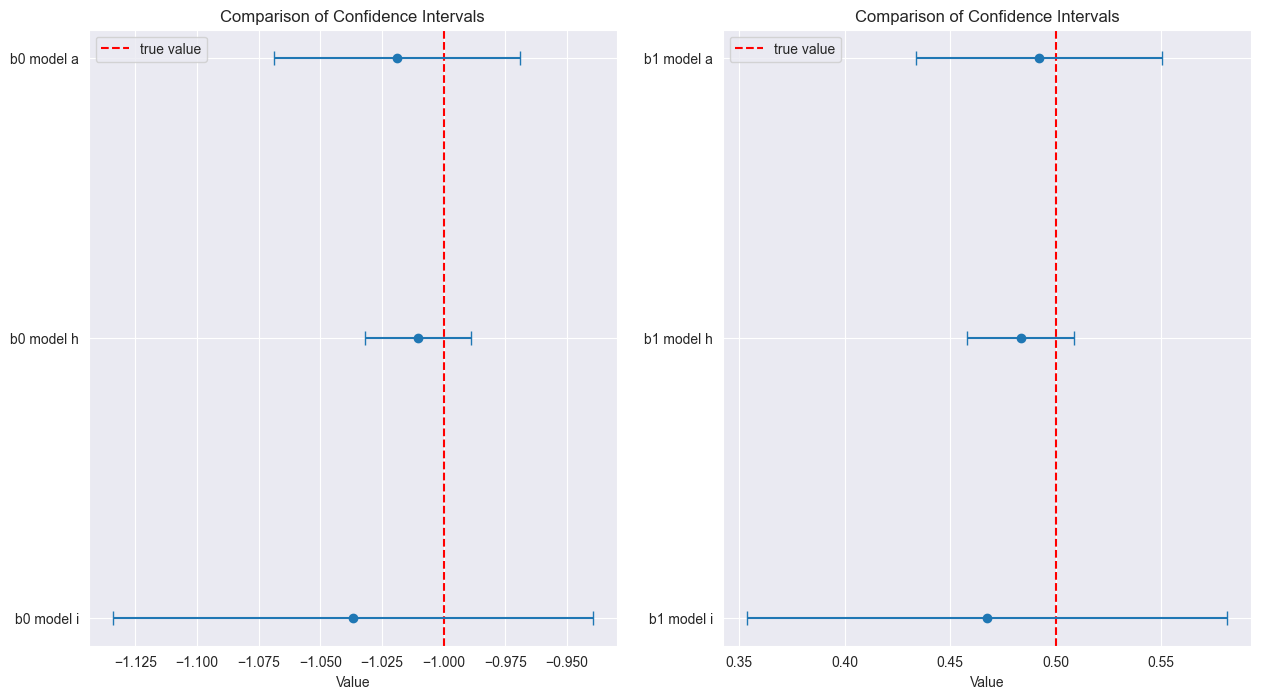

In [145]:
# define helper function to draw confidence intervals
def plot_coefficient_interval(data, true_val=None, subplot=None):
    """
    Plot coefficient interval.
    Parameters:
        data (Dict): a dictionary with keys is 'bi model <name>', value is a tuple [coefficient, lower_bound, upper_bound]
        subplot (List(Figure, Axes)): figure and axes objects to plot
    :return:
    """
    if subplot is None:
        fig, ax = plt.subplots(1,1, figsize=(8,8))
    else:
        fig, ax = subplot

    # plot the vertical line of true bi value
    if true_val is not None:
        ax.axvline(true_val, color='r', linestyle='--', label='true value')

    # Extract the point estimates and confidence interval errors
    points = [val[0] for val in data.values()]
    # The error is the difference between the bounds and the point estimate
    lower_errors = [val[0] - val[1] for val in data.values()]
    upper_errors = [val[2] - val[0] for val in data.values()]
    asymmetric_error = [lower_errors, upper_errors]

    # The y-positions for the horizontal lines
    y_pos = np.arange(len(data), 0, -1)

    # Plot the horizontal confidence intervals
    ax.errorbar(points, y_pos, xerr=asymmetric_error, fmt='o', capsize=5)

    # Set the y-axis labels to the point names
    ax.set_yticks(y_pos)
    ax.set_yticklabels(data.keys())

    # Add labels and title
    ax.set_xlabel("Value")
    ax.set_title("Comparison of Confidence Intervals")
    ax.legend()

    return fig, ax

# retrieve 95% confidence interval for bi
models = [model_13_a, model_13_h, model_13_i]
keys = ('a', 'h', 'i')
bi_dicts = [dict(), dict()]
bi = [f'b{i}' for i in range(2)]
for i, bi_dict in zip(range(len(bi_dicts)), bi_dicts):
    for model, key in zip(models, keys):
        bi_dict[f'{bi[i]} model {key}'] = [model.params[i], * model.conf_int(alpha=0.05)[i]]

# plot the 95% confidence interval
fig, ax = plt.subplots(1,2, figsize=(15,8))

plot_coefficient_interval(data=bi_dicts[0], true_val=-1, subplot=(fig, ax[0]))
plot_coefficient_interval(data=bi_dicts[1], true_val=0.5, subplot=(fig, ax[1]));


### 13.j

The noise in the models are generated following a normal distribution centering at 0 and has variance:
* model a: 0.25
* model h: 0.1
* model i: 0.5
* model h < model a < model i

The figure showing the comparison of confidence intervals of b0 and b1 between 3 models show tha the noisier the data is, i.e. the higher the variance, the larger the 95% confidence interval of the coefficients.